In [2]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statistics import mean
import scipy
from pathlib import Path
import math
from scipy.optimize import curve_fit,least_squares,leastsq
from scipy.interpolate import interp1d
from scipy.optimize import Bounds
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal 
from scipy.signal import lombscargle
import operator

In [3]:
t_hor = 5010;
lambda_min = 7;
lambda_max = 13;
waves = np.linspace(7,13,120)
A_ne = 4.0832;
B_ne = 2.0041;
C_ne = .20646;
D_ne = 3.9928;
E_ne = 3866.92;
A_no = 4.1318;
B_no = 1.8584;
C_no = .21999;
D_no = 2.76773;
E_no = 2962.98;
def retardance(wavelength):
    ne = np.sqrt(A_ne + (B_ne*wavelength**2)/(wavelength**2 - C_ne) + (D_ne*wavelength**2)/(wavelength**2 - E_ne));
    no = np.sqrt(A_no + (B_no*wavelength**2)/(wavelength**2 - C_no) + (D_no*wavelength**2)/(wavelength**2 - E_no)); 
    b = ne - no; 

    retardance = (b*t_hor);
    return retardance

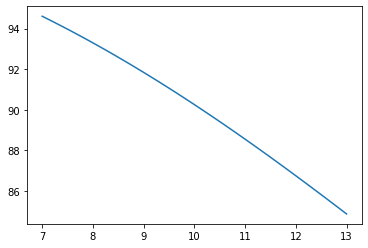

In [4]:
r = []
for i in range(len(waves)):
    ret = retardance(waves[i])
    r.append(ret) 
plt.plot(waves,r)

In [5]:
def delta_lambda(lambda_c):
    delta = retardance(lambda_c)
    return(lambda_c**2/(delta*(1 +(lambda_c**2 / (4*delta**2)))))

def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

In [6]:
lambda_c = []
lambda1  = []
lambda2  = []
pixel_c = []
pixel1  = []
pixel2  = [] 
for l in waves:
    size = delta_lambda(l)
    low  = l-size/2
    print(size)
    high = l+size/2
    if low > lambda_min and high < lambda_max:
        lambda_c.append(l)
        lambda1.append(low)
        lambda2.append(high)
        
        pixel_c.append(find_nearest(waves,l))
        pixel1.append(find_nearest(waves,low))
        pixel2.append(find_nearest(waves,high))

0.517232525591935
0.5250459702599484
0.532925231766624
0.5408705235606682
0.5488820607254113
0.5569600599776516
0.5651047396664765
0.5733163197719462
0.5815950219034169
0.589941069297948
0.5983546868184909
0.6068361009517745
0.6153855398062164
0.6240032331095214
0.6326894122060528
0.641444310054267
0.6502681612236654
0.6591612018916614
0.6681236698403208
0.6771558044527566
0.6862578467094116
0.6954300391840582
0.7046726260395461
0.7139858530234146
0.7233699674631765
0.7328252182613842
0.7423518558904386
0.7519501323871293
0.7616203013469394
0.7713626179179236
0.7811773387946955
0.7910647222115952
0.8010250279359095
0.8110585172607521
0.8211654529975834
0.8313460994683222
0.8416007224973164
0.8519295894027674
0.8623329689880618
0.8728111315326218
0.8833643487821284
0.893992893938947
0.9046970416517663
0.9154770680048988
0.9263332505071856
0.9372658680807966
0.9482752010490195
0.9593615311243257
0.970525141395401
0.9817663163140765
0.99308534168172
1.004482504635245
1.0159580936323087
1.

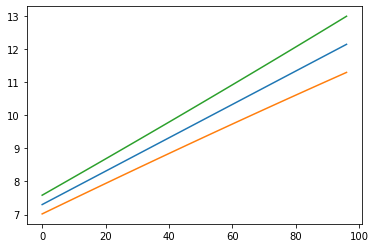

In [7]:
plt.plot(lambda_c)
plt.plot(lambda1)
plt.plot(lambda2)

10.781512605042018
10.130400575502751
11.432624634581284


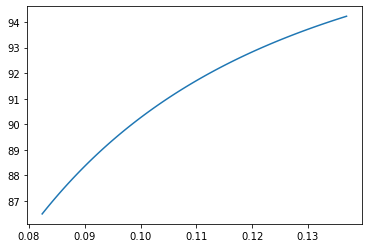

In [8]:
ind = 69
print(lambda_c[ind])
print(lambda1[ind])
print(lambda2[ind])

wavenums = np.divide(1,lambda_c)

ret = list(map(lambda x: retardance(x), lambda_c))
plt.plot(wavenums,ret)

In [9]:
save_path = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP1//Calibration//Files//'

cal_file2 =  save_path + 'cam1pixel.h5'
cal_file1 =  save_path + 'cam2pixel.h5'

In [10]:
temps = np.arange(22.5, 60.1, 0.2)
numtemps = len(temps)
imgs1 = np.zeros([numtemps,256,320])
imgs2 = np.zeros([numtemps,256,320])
std1 = np.zeros([numtemps,256,320])
std2 = np.zeros([numtemps,256,320])
temps1 = np.zeros(numtemps)
temps2 = np.zeros(numtemps)


In [11]:
for i in range(numtemps):
    with h5py.File('C://Users//khart//Documents//Summer2022Campaign//IRCSP1//Calibration//Data//05182022//LUT//'+str(round(temps[i],3))+'C.h5', "r") as f:

        imgs1[i] = np.array(f[list(f.keys())[0]])
        imgs2[i] = np.array(f[list(f.keys())[1]])
        temps1[i] = np.array(f[list(f.keys())[4]])
        temps2[i] = np.array(f[list(f.keys())[5]])


OSError: Unable to open file (unable to open file: name = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP1//Calibration//Data//05182022//LUT//22.5C.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [11]:
waves = np.linspace(7,13,120)
temps = np.arange(22.5, 60.1, 0.2)

ymin1 = 140; ymax1 = 180;
ymin2 = 120; ymax2 = 160

FOV = 5.33
HFOV = FOV/4
angles = np.round(np.linspace(-HFOV,HFOV,ymax2-ymin2))

In [12]:
im1 = []
im2 = []
for t in range(numtemps):
    c1 = (imgs1[t]-np.mean(imgs1[t][ymax1+1:ymax1+10,145:155]))
    c2 = (imgs2[t]-np.mean(imgs2[t][ymax2+1:ymax2+10,145:155]))
    
    im1.append(c1)
    im2.append(c2)

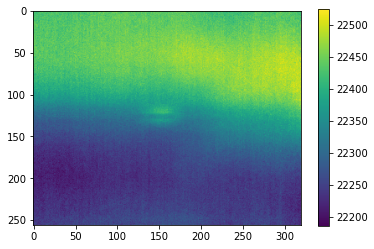

In [13]:
plt.imshow(imgs1[0])
plt.colorbar()

42.49999999999993

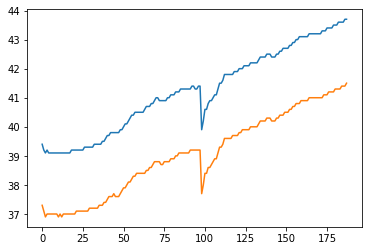

In [14]:
plt.plot(temps1)
plt.plot(temps2)
temps[100]

In [15]:
def f(T, A, B): # this is your 'straight line' y=f(x)
    return A*T + B

def pixel_registration(array,cal_file,waves,ymin,ymax):
    #import cal file
    with h5py.File(cal_file, "r") as h5:

        fit = np.array(h5.get('/pixel_registration/fitparams'))
        ROI = np.array(h5.get('/pixel_registration/ROI'))

    array=array[ymin:ymax,ROI[0]:ROI[1]]
    
    new = np.zeros([len(array),len(waves)])
    for i in range(len(array)):
        for l in range(len(waves)):    
            w=  waves[l]
            j = int(round(f(w,fit[0],fit[1])))
            values = array[i,j-1:j+1]
            value = np.mean(values)
            new[i,l] = value
    return(new)



C:\Users\khart\AppData\Local\Continuum\anaconda3\envs\flirpy\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khart\AppData\Local\Continuum\anaconda3\envs\flirpy\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


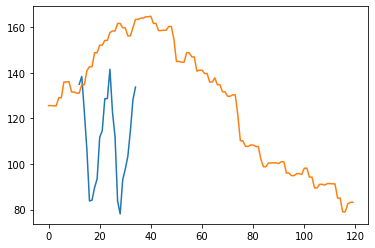

In [16]:
#Find location of 0 degree point
cal_file1 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP1//Calibration//Files//cam1pixel.h5'
cal_file2 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP1//Calibration//Files//cam2pixel.h5'

i=50


p2 = pixel_registration(im2[i],cal_file2,waves,120,125)
p1 = pixel_registration(im1[i],cal_file1,waves,125,130)
plt.plot(np.mean(p2,axis = 0))
plt.plot(np.mean(p1,axis = 0))
plt.show()


y1 = 2
y2 = 2

In [234]:
responses = np.zeros([len(temps),len(waves)])
responses1 = np.zeros([len(temps),len(waves)])
responses2 = np.zeros([len(temps),len(waves)])
responses_err = np.zeros([len(temps),len(waves)])
responses_err1 = np.zeros([len(temps),len(waves)])
responses_err2 = np.zeros([len(temps),len(waves)])

for t in range(len(temps)):
    p2 = pixel_registration(im2[t],cal_file2,waves,120,125)
    p1 = pixel_registration(im1[t],cal_file1,waves,125,130)
    s2 = pixel_registration(std2[t],cal_file2,waves,120,125)
    s1 = pixel_registration(std1[t],cal_file1,waves,125,130)

    responses1[t]= p1[y1]
    responses_err1[t]= s1[y1]
    responses2[t]= p2[y2]
    responses_err2[t]= s2[y2]
    
    err = np.sqrt(((s2[y2]/p2[y2])**2+(s1[y2]/p1[y2])**2)/10)
    responses[t]= p2[y2]+p1[y1]
    responses_err[t]= err

C:\Users\khart\AppData\Local\Continuum\anaconda3\envs\flirpy\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khart\AppData\Local\Continuum\anaconda3\envs\flirpy\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<ipython-input-235-dedf867c5215>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(waves, temps, responses1)


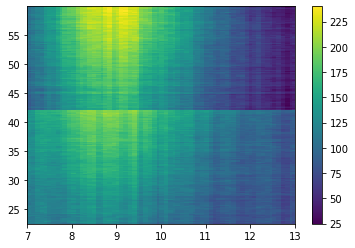

In [235]:
plt.pcolormesh(waves, temps, responses1)
plt.colorbar()

IndexError: list index out of range

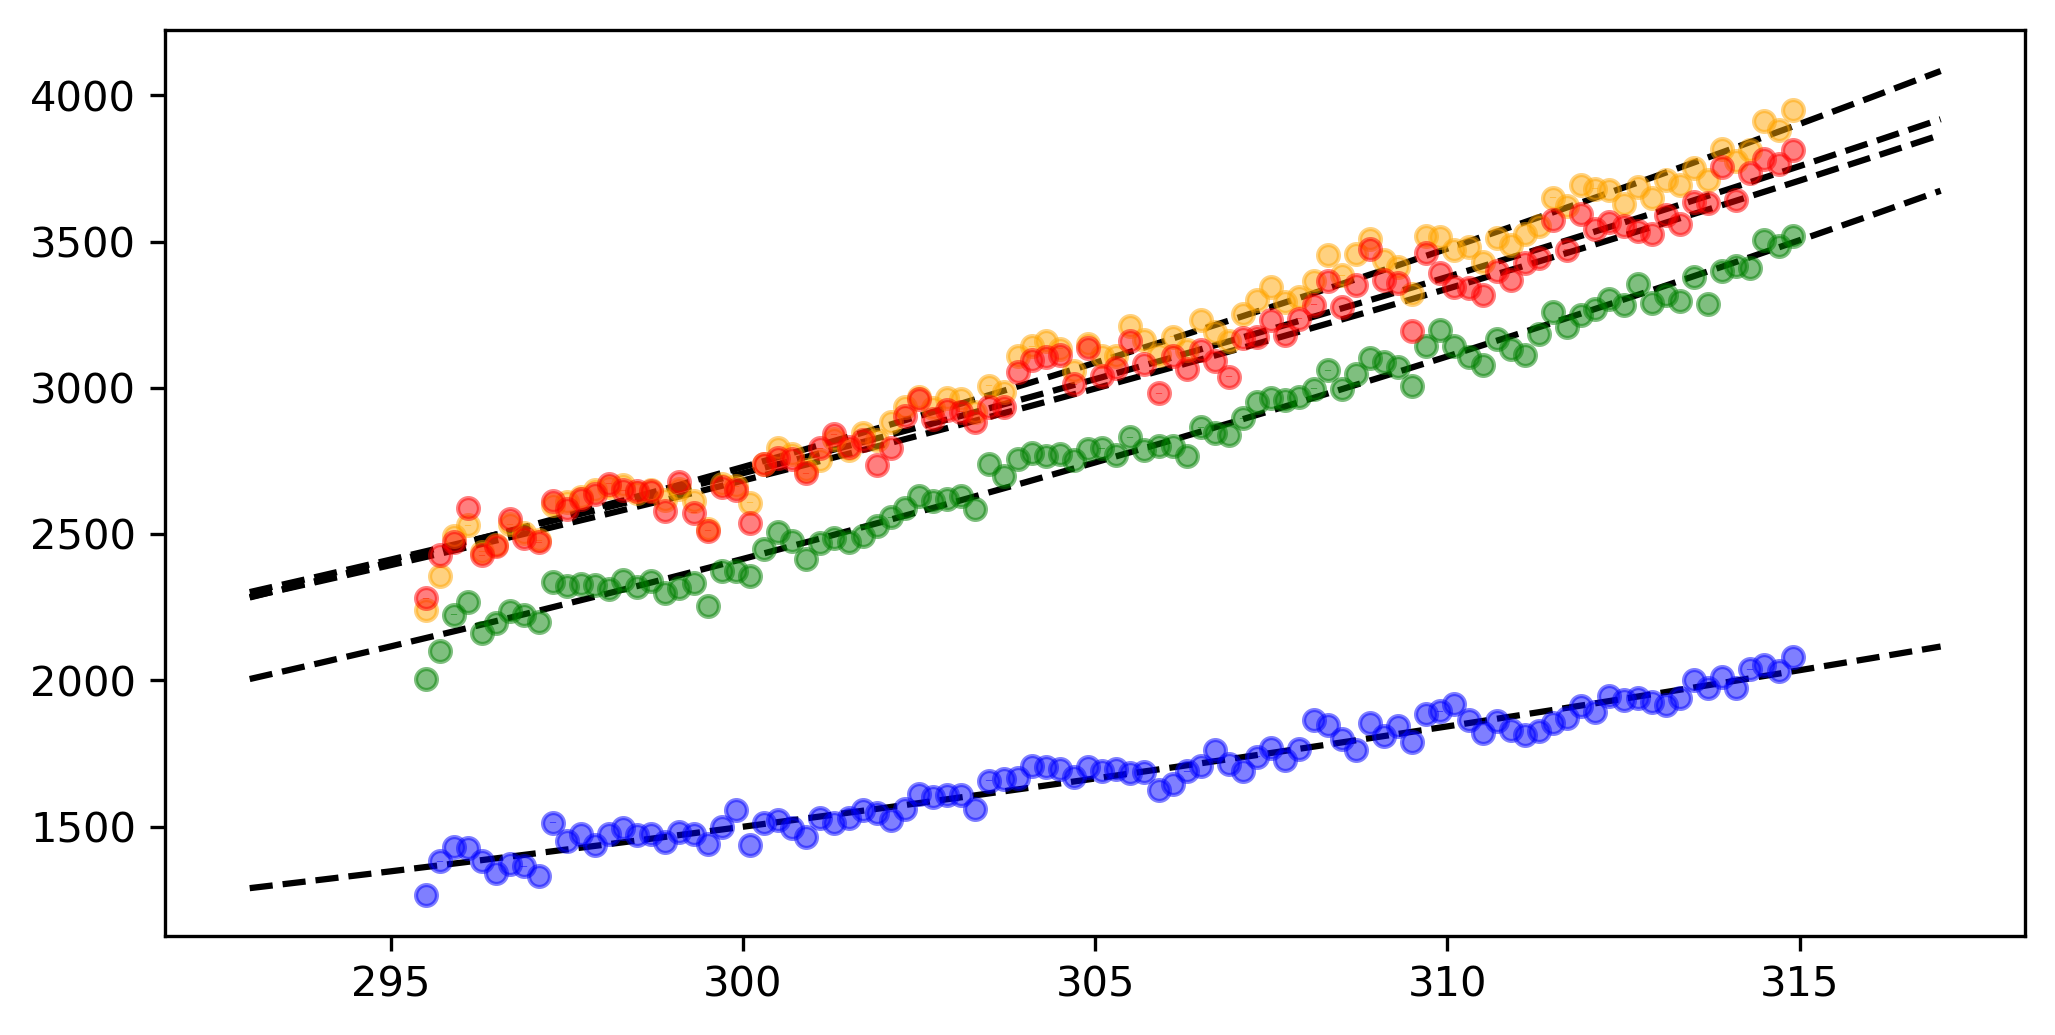

In [236]:
""" Fitting Function"""
def func(x, a, b):
    y = a*(x-b)**4 
    return y

colors = ['blue','green','orange','red']
fig = plt.subplots(figsize = [8,4])
plt.gcf().set_dpi(300)
nu =[10,40,50,60,61]
for i in range(5):
    ind = nu[i]
    start = pixel1[ind]
    stop  = pixel2[ind]

    x = temps[0:98] + 273
    y = np.sum(responses1[0:98,start:stop],axis = 1)
    y_err = np.sum(responses_err[0:98,start:stop],axis = 1)
    x2 = np.arange(20,45) +273

    popt, pcov = curve_fit(func, x, y, sigma = y_err)

    plt.plot(x2, func(x2, *popt), 'k--')
    plt.errorbar(x,y,yerr = y_err,fmt='.',color = colors[i],alpha=0.5,markersize = 10,label = str(np.round(lambda_c[ind],1)))

plt.xlabel("Scene Brightness Temperature")
plt.ylabel("Counts [ADU]")
legend = plt.legend(title = 'Wavelength [$\mathdefault{\mu m}$]',framealpha=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.show()

popt

In [184]:
var = np.zeros([36,2])
covar = np.zeros([36,2])

for ind in range(36):
    start = pixel1[ind]
    stop  = pixel2[ind]
    
    x = temps + 273
    y = np.sum(responses[:,start:stop]+100,axis = 1)
    y_err = np.sum(responses_err[:,start:stop],axis = 1)

    popt, pcov = curve_fit(func, x, y, sigma = y_err)

    var[ind] = popt
    covar[ind] = np.sqrt(np.diag(pcov))
    
plt.errorbar(lambda_c[:36],var[:,1],yerr=covar[:,0],fmt = 'b.')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

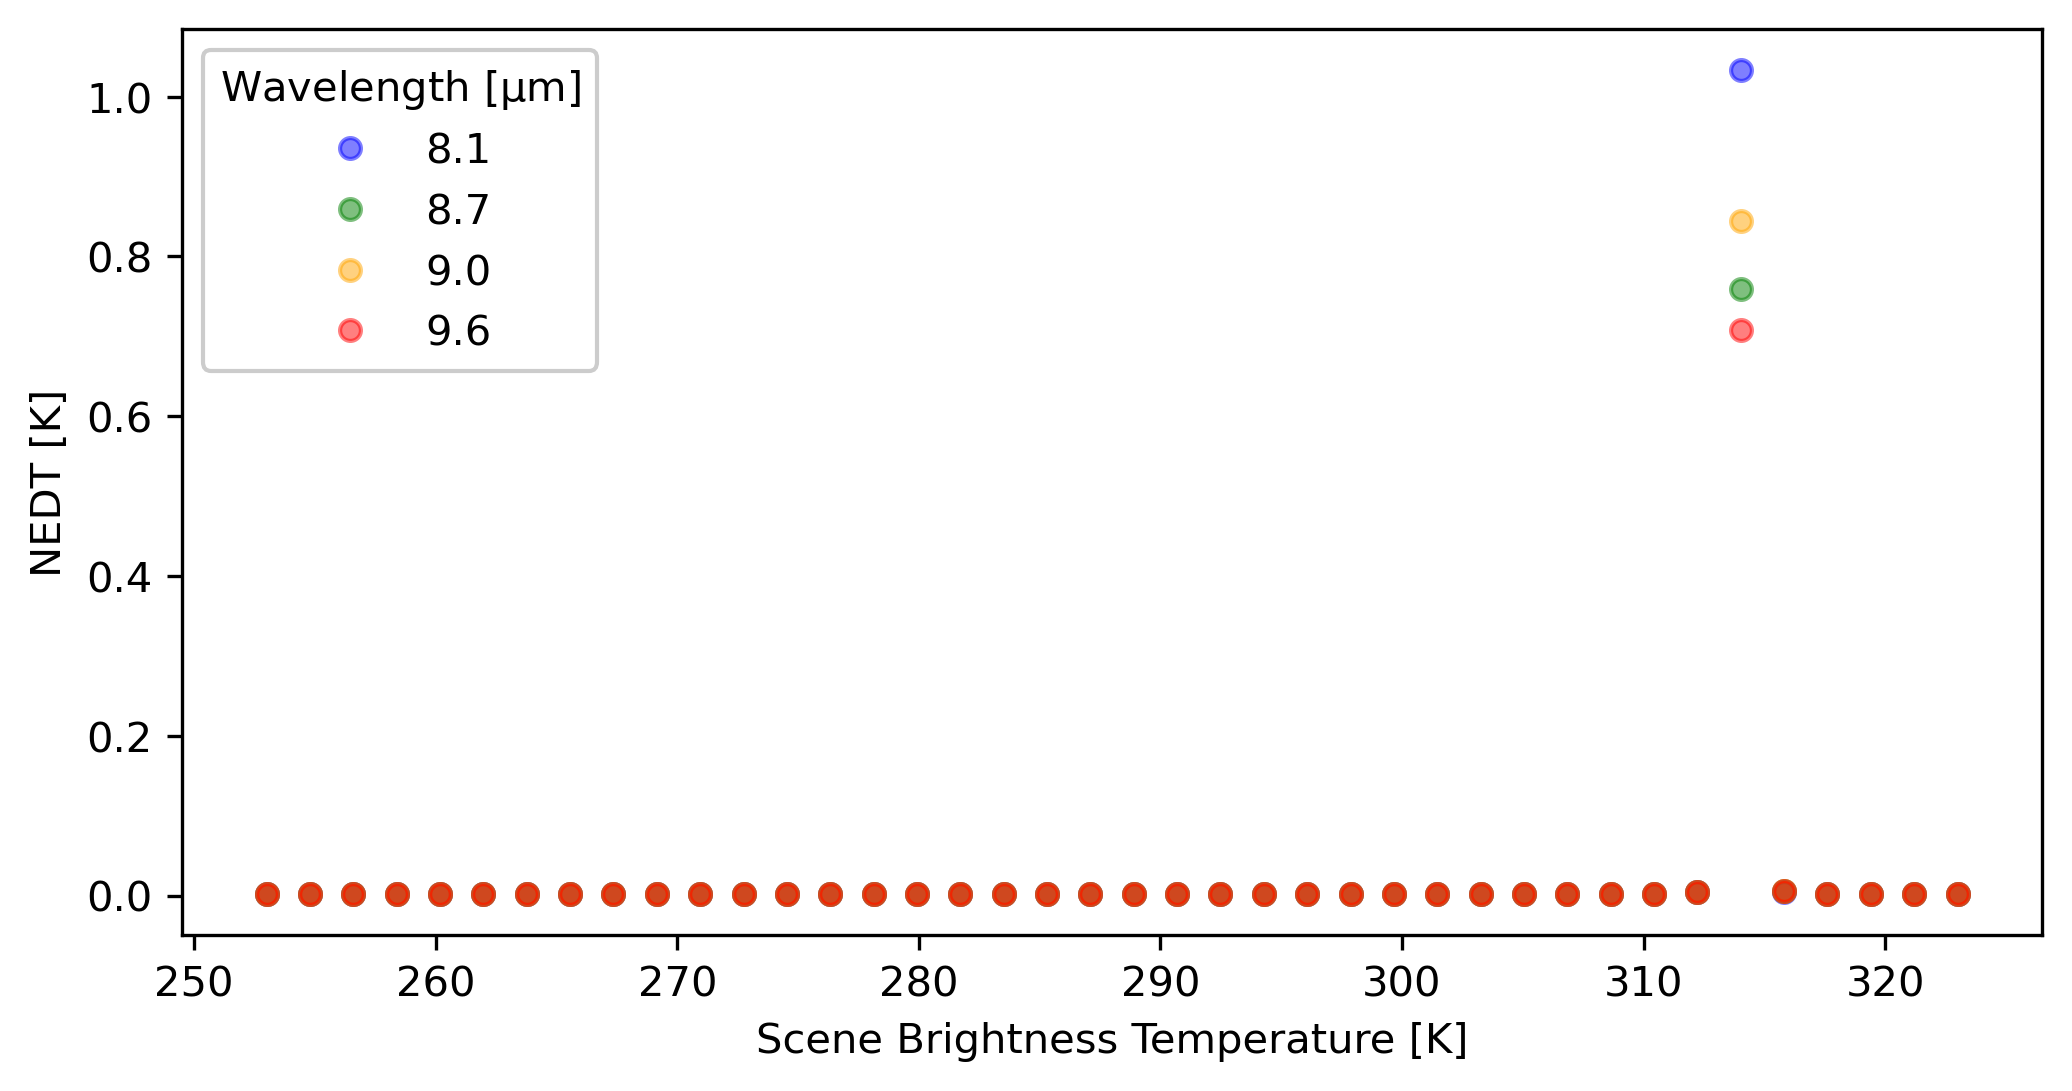

In [19]:
temp = np.linspace(-20,50,40) + 273
nedts = np.zeros([len(waves),len(temp)])
for i in range(36):
    for t in range(len(temp)):
        tem = temp[t]
        snr =  0
        delta = 0
        start = pixel1[i]
        stop  = pixel2[i]

        e = np.sum(responses_err[:,start:stop]/responses[:,start:stop])
        
        while snr < e:
            snr = np.abs(func(tem+delta/2,var[i,0],var[i,1])-func(tem-delta/2,var[i,0],var[i,1]))
            delta = delta +.001 

        nedts[i,t] = delta
fig = plt.subplots(figsize = [8,4])
plt.gcf().set_dpi(300)

for i in range(4):
    ind = nu[i]
    plt.plot(temp,nedts[ind-10],'.',label = str(np.round(lambda_c[ind],1)), markersize = 10,color = colors[i],alpha = 0.5)
plt.legend( title='Wavelength [$\mathdefault{\mu}$m]')
plt.gcf().set_dpi(300)
plt.ylabel("NEDT [K]")
plt.xlabel("Scene Brightness Temperature [K]")

legend = plt.legend(title = 'Wavelength [$\mathdefault{\mu m}$]',framealpha=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.show()

In [ ]:
hf = h5py.File(save_path + 'calibration.h5', 'a')
g = hf.create_group('radiometric')
g.create_dataset('nedt',data= nedts)
g.create_dataset('var',data=var)
g.create_dataset('covar',data=covar)
hf.close()